## Summary of the data

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

## Objectives of the Project

* To unravel employment outcomes of computer science and engineering graduates
* To investigate if Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer earn up to 2.5-3 lakhs as a fresh graduate.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

C:\Users\USER\AppData\Local\Temp\ipykernel_11232\4223845881.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import dataset
df = pd.read_excel('data.xlsx')

# view the firdt five rows of data
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
# Shape of dataset
df.shape

(3998, 39)

In [4]:
# Check duplicates
df.duplicated().sum()

0

In [5]:
# checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

## Data Cleaning

In [6]:
# create age column
df['age_at_hire'] = df['DOJ'].dt.year - df['DOB'].dt.year

In [7]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age_at_hire
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110,22.611306
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,22.000000
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,22.000000
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,23.000000
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,32.000000
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075,1.360287


In [8]:
# Remove values less than 18 from age column
df = df[df['age_at_hire'] >= 18]

In [9]:
# Remove 0 and negative values from Graduation Year column
df = df[df['GraduationYear'] > 0]

In [10]:
#convert some columns to object datatype
object_cols = ['ID', '12graduation', 'CollegeID', 'CollegeTier', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear']
for var in object_cols:
    df[var] =df[var].astype(str)

In [11]:
# confirm columns has been sucessfully converted
df.dtypes

Unnamed: 0                       object
ID                               object
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                     object
12percentage                    float64
12board                          object
CollegeID                        object
CollegeTier                      object
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                    object
CollegeCityTier                  object
CollegeState                     object
GraduationYear                   object
English                           int64
Logical                           int64


In [12]:
numerical_data = df.select_dtypes(include=[np.number])
numerical_data.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age_at_hire
0,420000,84.3,95.8,78.00,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,22
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,24
2,325000,85.0,68.2,70.00,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,22
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,22
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,23


In [13]:
numerical_data.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age_at_hire'],
      dtype='object')

In [14]:
# Replace negative with nan in other numerical columns
for var in numerical_data.columns:
        df[var] = df[var].apply(lambda x : x if x > 0 else np.nan)

## Univariate Analysis

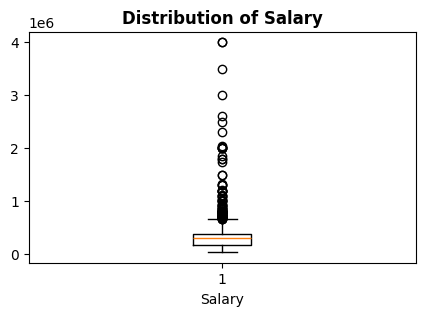

In [15]:
# Dectection of outliers in Salary column
plt.figure(figsize=[5,3])
plt.boxplot(df['Salary'])
plt.xlabel('Salary')
plt.title(f'Distribution of Salary',weight='bold');

In [16]:
#removing outliers in Salary
iqr = df['Salary'].quantile(0.75) - df['Salary'].quantile(0.25)
lower = df['Salary'].quantile(0.25) - 1.5 * iqr
upper =df['Salary'].quantile(0.75) + 1.5 *iqr
df = df[(df['Salary'] >= lower) & (df['Salary'] <= upper)]

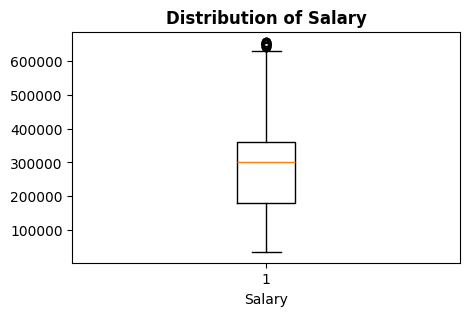

In [17]:
# Distribution of Salary
plt.figure(figsize=[5,3])
plt.boxplot(df['Salary'])
plt.xlabel('Salary')
plt.title(f'Distribution of Salary',weight='bold');

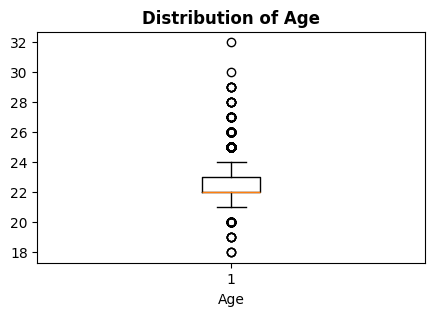

In [18]:
# Distribution of Age
plt.figure(figsize=[5,3])
plt.boxplot(df['age_at_hire'])
plt.xlabel('Age')
plt.title(f'Distribution of Age',weight='bold');

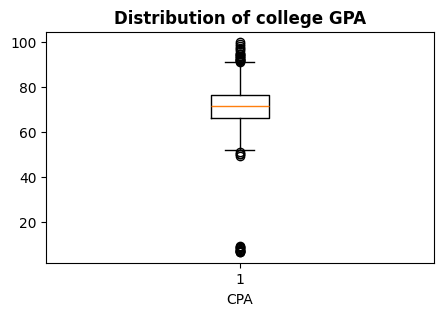

In [19]:
# Distribution of college GPA
plt.figure(figsize=[5,3])
plt.boxplot(df['collegeGPA'])
plt.xlabel('CPA')
plt.title(f'Distribution of college GPA',weight='bold');

In [20]:
df.shape

(3885, 40)

In [21]:
# dataset summary statistics
df.drop(['DOJ','DOB'],axis=1).describe()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age_at_hire
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3646.000000,3041.000000,1119.000000,891.000000,221.00000,160.000000,371.000000,36.000000,1987.000000,2459.000000,2112.000000,1697.000000,1920.000000,3885.000000
mean,285388.416988,77.853951,74.414734,71.428842,500.570142,500.692149,511.564221,0.605852,450.334758,335.226095,405.132435,405.59276,432.956250,349.827493,339.611111,0.769944,0.696745,0.692922,0.756192,0.613252,22.614929
std,126420.349460,9.848454,11.001677,8.092979,104.735865,86.428164,121.529577,0.273339,96.185986,81.534686,90.009078,84.77841,98.819469,75.843277,73.699885,0.490878,0.464217,0.496202,0.607685,0.417387,1.294838
min,35000.000000,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,0.002750,115.000000,133.000000,130.000000,180.00000,206.000000,153.000000,166.000000,0.046400,0.032800,0.010000,0.003500,0.028400,18.000000
25%,180000.000000,71.600000,66.000000,66.330000,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,346.00000,366.000000,286.000000,292.000000,0.355500,0.344800,0.317400,0.272700,0.288900,22.000000
50%,300000.000000,79.000000,74.250000,71.680000,500.000000,505.000000,515.000000,0.635979,445.000000,333.000000,407.000000,407.00000,426.500000,356.000000,340.000000,0.702700,0.656800,0.624800,0.649800,0.502400,22.000000
75%,360000.000000,85.600000,82.500000,76.250000,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.00000,500.000000,393.000000,388.000000,1.133600,1.044900,1.085900,1.119900,0.863700,23.000000
max,655000.000000,97.120000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.00000,676.000000,548.000000,516.000000,1.995300,1.904800,2.315400,3.352500,1.822400,32.000000


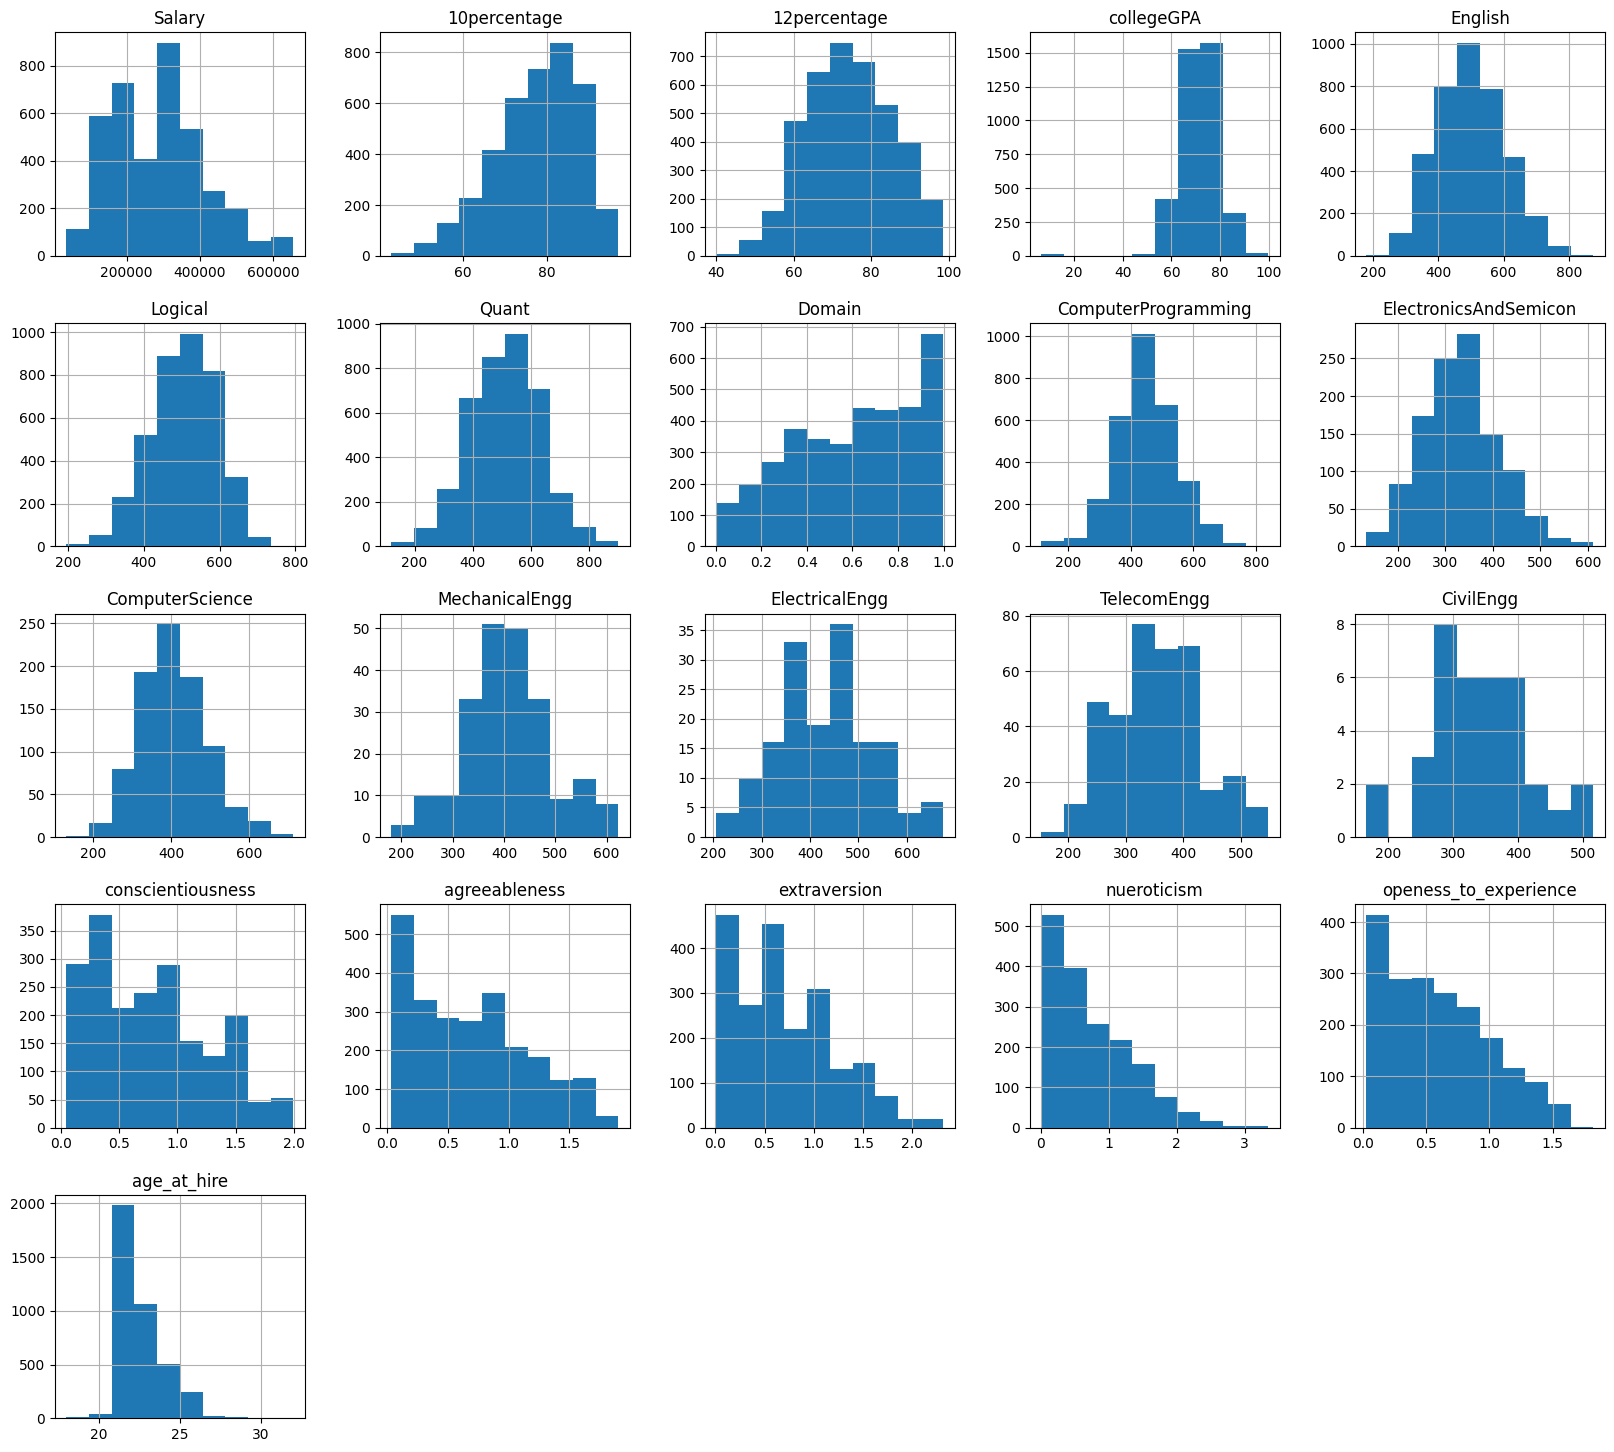

In [22]:
# Frequency distribution of numerical distributions
df.drop(['DOJ','DOB'],axis=1).hist(figsize=(20,18));

In [ ]:
#for var in numerical_data.columns:
#    ax= df[[var]].plot(kind='hist')
 #   df[[var]].plot(kind='kde',ax=ax,secondary_y=True);

In [23]:
# Frequency distribution of categorical columns
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data = categorical_data.drop(['Unnamed: 0','ID','DOJ','DOL','DOB','CollegeCityID','CollegeID'],axis=1)
categorical_data.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12graduation',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier',
       'CollegeState', 'GraduationYear'],
      dtype='object')

In [24]:
import Levenshtein
from fuzzywuzzy import process

In [25]:
# Spelling correction using fuzzy matching
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [26]:
choices= ['quality engineer', 'php developer', 'network engineer', 'data entry operator','software engineer', 
          'programmer analyst', 'systems analyst', 'application developer',
          'ios developer', 'executive assistant', 'associate engineer', 'software developer','quality assurance analyst',
          'android developer', 'java developer', 'technical support engineer', 'data analyst', 'test engineer',
          'php developer', 'research associate', 'project engineer', 'technical support executive', 'business analyst',
          'web developer', 'project coordinator', 'sap consultant', '.net developer', 'system engineer', 'quality analyst',
          'system administrator', 'network administrator', 'quality engineer', 'technical support specialist',
          'customer service','quality assurance automation engineer', 'associate engineer', 'human resources associate',
          'mobile application developer', 'process associate', 'it support specialist', 'asp.net developer',
          'sales executive', 'admin assistant','account executive', 'oracle dba', 'assistant professor',
          'operations executive', 'trainee engineer', '.net web developer', 'operations assistant', 'programmer',
          'research analyst', 'ui developer', 'software architect', 'software quality assurance tester',
          'assistant manager', 'seo trainee', 'process engineer', 'graduate engineer trainee',
          'software quality assurance analyst', 'designer', 'technical recruiter', 'technical engineer','software trainee',
          'windows systems administrator', 'python developer', 'javascript developer', 'operation executive',
          'assistant system engineer', 'lead engineer', 'portfolio analyst', 'engineer', 'technical lead', 'operations',
          'quality assurance tester', 'automation engineer', 'product development engineer', 'client services associate',
          'manual tester', 'sr. engineer', 'entry level management trainee', 'cloud engineer', 'data scientist',
          'technology lead', 'junior engineer', 'hr generalist', 'marketing analyst', 'lecturer', 'it executive',
          'salesforce developer', 'sql dba', 'junior engineer product support', 'c# developer', 'business analyst',
          'executive hr', 'sharepoint developer', 'quality associate', 'process advisor', 'customer service representative',
          'etl developer', 'training specialist', 'assistant programmer', 'it analyst', 'mis executive',
          'database administrator', 'business development executive', 'technical operations analyst',
          'quality assurance test engineer', 'seo engineer', 'application engineer', 'talent acquisition specialist',
          'business analyst consultant', 'sales engineer', 'sales associate', 'quality assurance engineer',
          'operations analyst', 'phone banking officer', 'support engineer', 'technology analyst',
          'network support engineer', 'it business analyst', 'system analyst', '.net developer', 'process executive',
          'web designer', 'html developer', 'management trainee', 'administrative support',
          'field business development associate', 'systems administrator', 'administrative coordinator',
          'desktop support engineer', 'it engineer', 'human resources intern', 'quality assurance engineer',
          'quality assurance', 'delivery software engineer', 'graphic designer', 'sales development manager', 'developer',
          'team lead', 'web intern', 'full stack developer', 'business systems consultant', 'database developer',
          'associate engineer', 'product engineer', 'technical analyst', 'executive engineer', 'engineer trainee',
          'information security analyst', 'desktop support technician', 'software analyst', 'desktop support analyst',
          'graduate engineer', 'research engineer', 'human resource assistant', 'hr assistant', 'it recruiter',
          'it technician', 'sql developer', 'research staff member', 'seo executive',
          'business system analyst', 'senior engineer', 'business systems analyst', 'software programmer',
          'assistant store manager', 'project assistant', 'ruby on rails developer', 'account manager',
          'assistant administrator', 'teradata dba', 'marketing coordinator', 'associate developer', 'assistant engineer',
          'risk consultant', 'project manager', 'field service engineer', 'marketing assistant', 'web application developer',
          'help desk technician', 'online marketing manager', 'product manager', 'linux systems administrator', 'ase',
          'software test engineer', 'front end developer', 'apprentice', 'senior research fellow',
          'information technology specialist', 'business development manager', 'graduate trainee engineer',
          'assistant system engineer trainee', 'teradata developer', 'network security engineer', 'senior programmer',
          'software test engineer', 'software executive', 'team leader', 'system engineer', 'seo analyst', 'r & d',
          'front end web developer', 'sap functional consultant', 'software designer', 'general manager',
          'sap abap consultant', 'technical consultant', 'computer faculty','business intelligence analyst',
          'operations manager', 'db2 dba', 'game developer']

In [27]:
myset = set(choices)
unique_choices = list(myset)

In [28]:
df["Designation"] = df["Designation"].apply(lambda designation: correct_spelling_errors(str(designation),unique_choices))

In [29]:
df['Designation'].nunique()

217

In [30]:
jobcity = ['Bangalore', 'Indore', 'Chennai', 'Manesar', 'Hyderabad', 'Noida', 'Kolkata', 'Pune', 'Gurgaon', 'Mohali', 'Jhansi', 'Delhi',
           'noida', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 
           'Rajkot', 'Greater Noida', 'Jaipur', 'Noida ', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar', 'Pune', 'coimbatore',
           'Dhanbad', 'Lucknow', 'Trivandrum', 'Kolkata', 'Gandhi Nagar', 'Una', 'Daman and Diu', 'chennai', 'Gurgoan', 'vsakhapttnam',
           'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore', 'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
           'Kanpur ', 'Gurgaon ', 'CHENNAI', 'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'Greater noida', 'Siliguri ', 'Raipur', 'Gurgaon',
           'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Bulandshahar', 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Thane',
           'Aurangabad', 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'vizag', 'Nouda', 'Dharamshala', 'Hissar','Madurai', 'Chandigarh',
            'Australia', ' Chennai', 'CHEYYAR', 'Mumbai', 'Sonepat', 'Ghaziabad', 'Pantnagar', 'Siliguri', 'Jagdalpur', 'Baroda', 'Ariyalur',
            'Jowai', 'Kochi/Cochin, Chennai and Coimbatore','Neemrana', 'VIZAG', 'Tirupathi', 'Lucknow ', 'Ahmedabad ','Calicut', 'Gandhinagar',
            'LUCKNOW', 'Bengaluru', 'Ahmednagar', 'Nashik','Bellary', 'Ludhiana', 'Muzaffarnagar', 'Gagret', 'Indirapuram, Ghaziabad', 'Gwalior', 
            'TRIVANDRUM', 'Chennai & Mumbai', 'Rajasthan', 'Sonipat', 'Bareli', 'Kanpur', 'Hospete', 'Miryalaguda', 'Dharuhera', 'lucknow', 
            'meerut', 'dehradun', 'Ganjam', 'Hubli', 'ncr', 'Agra', 'Trichy', 'kudankulam ,tarapur', 'Ongole', 'Sambalpur', 'Pondicherry', 'Bundi',
            'SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN', 'AM', 'Bikaner', 'Vadodara', 'india', 'Asansol', 'Tirunelvelli', 'Ernakulam', 'Bilaspur', 
            'Chandrapur', 'Nanded', 'Dharmapuri', 'Vandavasi', 'Bhubneshwar', 'Rohtak', 'trivandrum', 'Nagpur ', 'Udaipur', 'Patna', 'Ranchi', 
            'indore', 'Salem', 'Nasikcity', 'Gandhinagar ', 'Technopark','Trivandrum', 'Bharuch', 'Tornagallu', 'Raipur',  'Jaspur', 'Burdwan',
            'Bhubaneswar ', 'Shimla', 'Gajiabaad', 'Jammu', 'Shahdol', 'Muvattupuzha', 'Al Jubail, Saudi Arabia', 'Secunderabad', 'Ratnagiri',
            'Jhajjar', 'Gulbarga', 'Nalagarh', 'Chandigarh ', 'Jaipur ', 'Jeddah Saudi Arabia', 'PATNA', 'SHAHDOL', 'Tirupati', 'Gonda',
            'jamnagar', 'orissa', 'kharagpur', 'Trivandrum ', 'Joshimath', 'chandigarh', 'Bathinda', 'kala amb ', 'Karnal', 'Kota', 'Baddi HP',
            'Nagari', 'Mettur, Tamil Nadu ', 'pondi', 'Surat', 'Kurnool', 'kolhapur', 'Madurai ', 'GREATER NOIDA', 'Bhilai', 'Vizag', 'Bahadurgarh',
            'Rayagada, Odisha', 'kakinada', 'Varanasi', 'punr', 'Nellore', 'Meerut', 'Sahibabad', 'Howrah', 'BHUBANESWAR', 'Trichur', 'Ambala',
            'Khopoli', 'keral', 'Roorkee', 'ghaziabad', 'Allahabad', 'Delhi/NCR', 'Panchkula ', 'Panchkula', 'Ranchi ', 'Jalandhar', 'manesar', 'vapi',
            'PILANI', 'muzzafarpur', 'RAS AL KHAIMAH', 'bihar', 'singaruli', 'KANPUR', 'pondy', 'Mohali', 'Phagwara', 'GURAGAON', 'patna', 'Baripada',
            'MEERUT', 'Yamuna Nagar', 'shahibabad', 'sampla', 'Guwahati', 'Rourkela', 'Vellore', 'Dausa', 'latur (Maharashtra )', 'kanpur', 'Mainpuri',
            'karnal', 'Haldia', 'sambalpur', 'RAE BARELI', 'ranchi', 'jAipur',  'Patiala', 'Gorakhpur', 'Ambala City', 'Karad', 'Pilani', 'haryana',
            'Asifabadbanglore']


In [31]:
strip_jobcity = [x.strip(' ') for x in jobcity]
c_jobcity = [x.capitalize() for x in strip_jobcity]
set_jobcity = set(c_jobcity)
uq_jobcity = list(set_jobcity)


In [32]:
board = ['board of secondary education,ap', 'karnataka secondary education examination board kseeb',
         'kerala state technical education board', 'state board of secondary education(ssc), andhra pradesh', 
         'gujarat state board', 'maharashtra board', 'icse board', 'up board', 'board of secondary education(bse) orissa',
         'little jacky matric higher secondary school', 'uttar pradesh board', 'mp board', 'matriculation board', 'j & k board state board', 
         'haryana board of school education hbse', 'metric', 'ms board', 'mumbai board', 'electonincs and communication(dote)',
         'west bengal board of secondary education (wbbse)', 'jharkhand secondary examination board (jsbe), ranchi', 'kerala university',
         'up(allahabad)', 'nagpur board', 'don bosco maatriculation school', 'maharashtra board', 'himachal pradesh board of school education',
         'certificate of middle years program of ib', 'board of school education uttarakhand', 'jharkhand academic council', 'delhi board',
         'mirza ahmed ali baig', 'bse, odisha', 'rajasthan board of secondary education rbse', 'tamil nadu state matriculation board',
         'board of intermediate education, uttarpradesh', 'stjosephs girls higher sec school,dindigul', 'secondary school certificate'
         'board of secondary education, rajasthan', 'cluny', 'board of secondary education(bse) patna',
         'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district', 'hse, orissa', 'national public school',
         'jawahar navodaya vidyalaya', 'bharathi matriculation school', 'uttaranchal state board', 'anglo indian',
         'ghseb', 'stmary higher secondary', 'kiran english medium high school', 'sarada high scchool',
         'kalaimagal matriculation higher secondary school', 'uttrakhand board', 'bihar secondary education board',
         'haryana board of school education (hbse)', 'sri kannika parameswari highier secondary school, udumalpet', 'nashik board',
         'himachal pradesh board', 'dav public school,hehal', 'board of secondary education(bse), odisha', 'holy cross matriculation hr sec school',
         'kolhapur', 'gyan bharati school', 'madhya pradesh board', 'latur board', "stmary's convent inter college",
         'nagpur divisional board', 'jseb', 'central board of secondary education cbse', 'dav public school sec 14',
         'council for indian school certificate examination', 'aurangabad board', 'kea', 'ap state board for secondary education',
         'seba', 'punjab school education board (pseb), mohali', 'department of technical education, bangalore',  'dept of pre-university education',
        'council of higher secondary education(chse)']

In [33]:
strip_board = [x.strip(' ') for x in board]
c_board = [x.lower() for x in strip_board]
set_board = set(c_board)
uq_board = list(set_board)

In [34]:
df["JobCity"] = df["JobCity"].apply(lambda city: correct_spelling_errors(str(city),uq_jobcity))

In [35]:
df["10board"] = df["10board"].apply(lambda board: correct_spelling_errors(str(board),uq_board))

In [36]:
df["12board"] = df["12board"].apply(lambda board: correct_spelling_errors(str(board),uq_board))

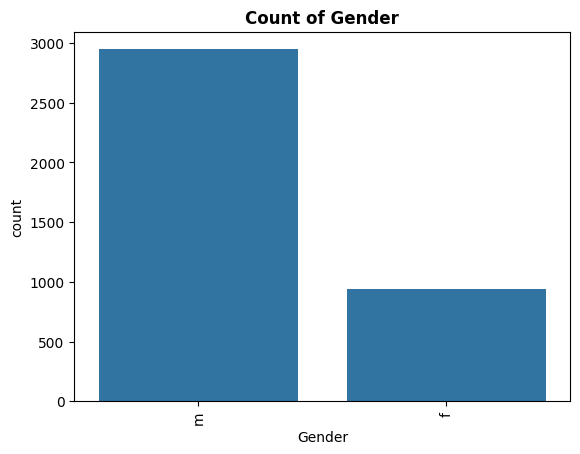

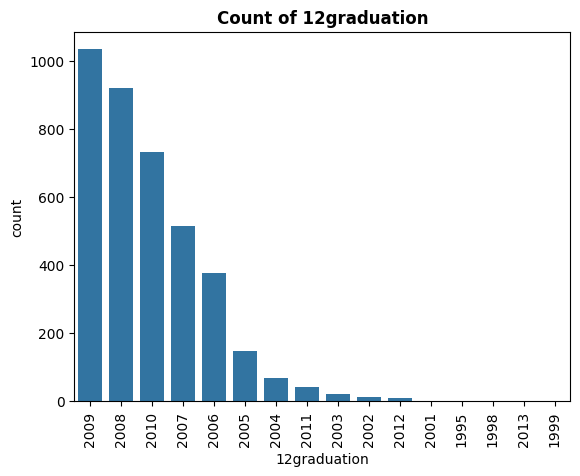

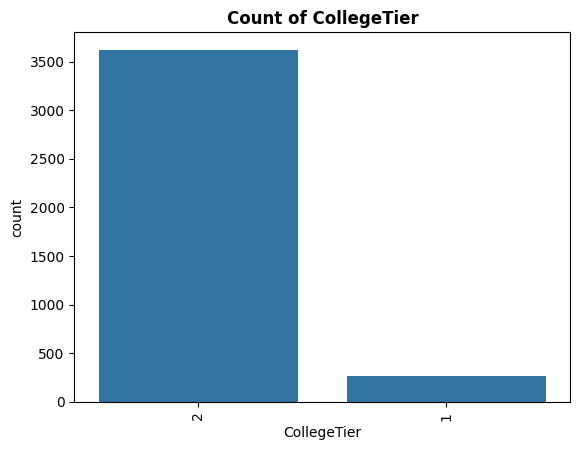

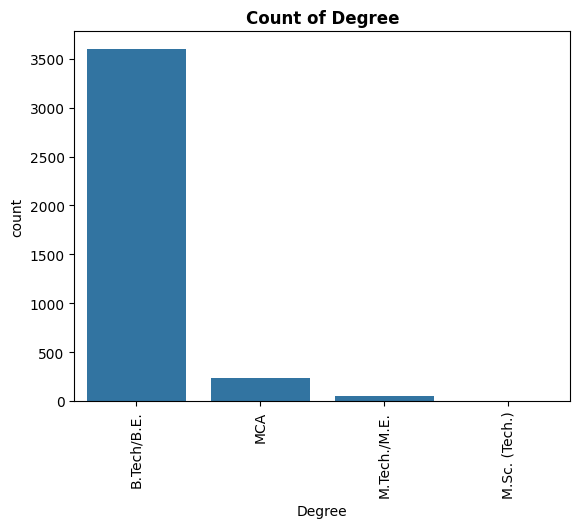

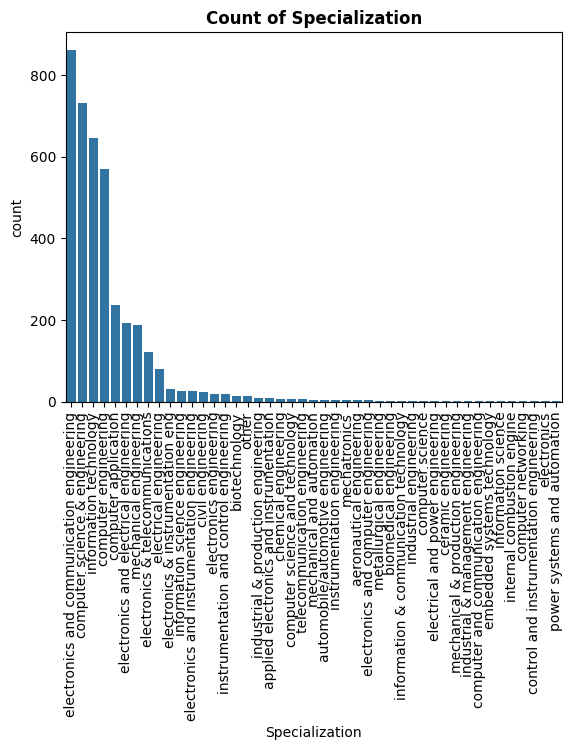

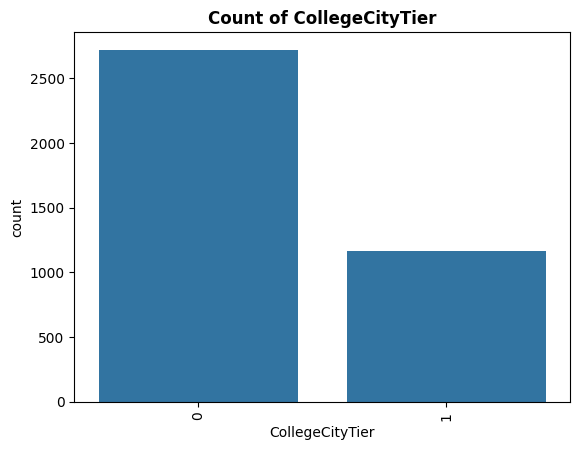

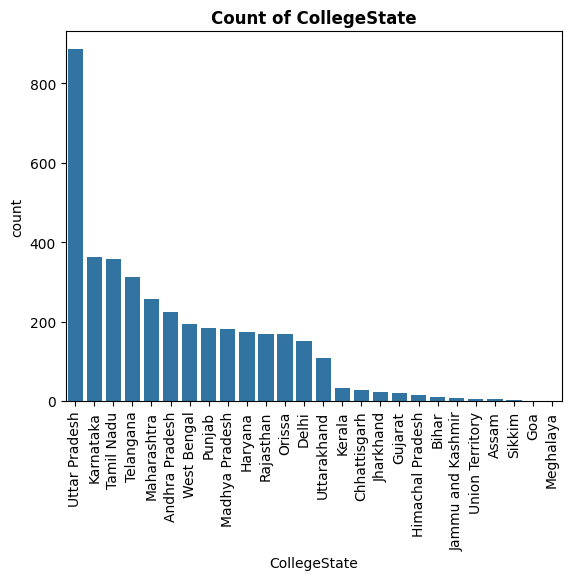

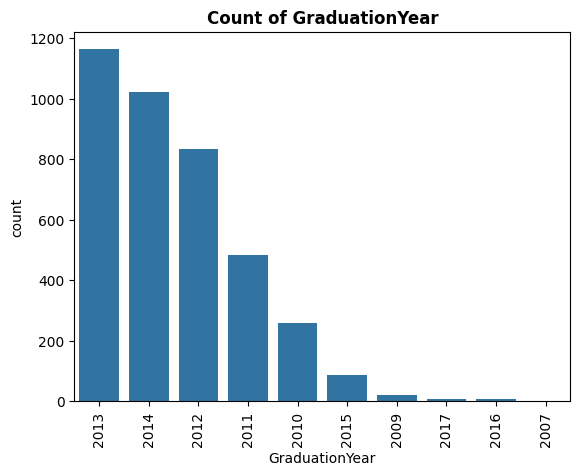

In [37]:
# frequency of categorical variable
cat_var1 = ['Gender', '12graduation','CollegeTier', 'Degree', 'Specialization',
            'CollegeCityTier', 'CollegeState', 'GraduationYear']
for var in cat_var1:
    fig, ax = plt.subplots()
    col_order = df[var].value_counts().index
    sb.countplot(data=df,x=var,order=col_order)
    plt.xticks(rotation=90)
    plt.title(f"Count of {var}",weight='bold');

In [38]:
# confirming the count of Degree
df['Degree'].value_counts()

Degree
B.Tech/B.E.      3600
MCA               235
M.Tech./M.E.       48
M.Sc. (Tech.)       2
Name: count, dtype: int64

M.sc.(Tech) is the same as M.Tech, so i'll be renaming the few instances of M.Sc.(Tech) to M.Tech./M.E.

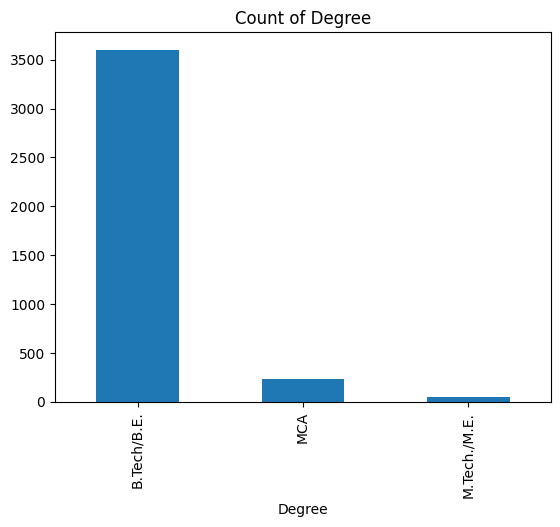

In [39]:
df['Degree'] = df['Degree'].replace("M.Sc. (Tech.)", "M.Tech./M.E.")
df['Degree'].value_counts().plot(kind='bar',title='Count of Degree');

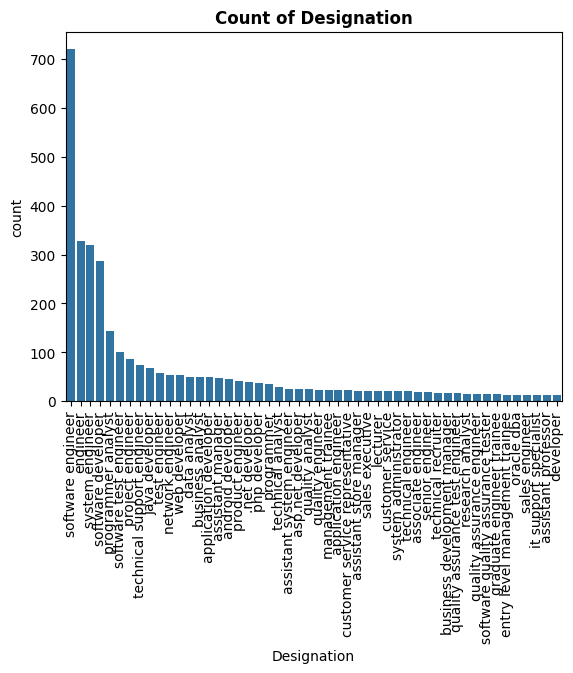

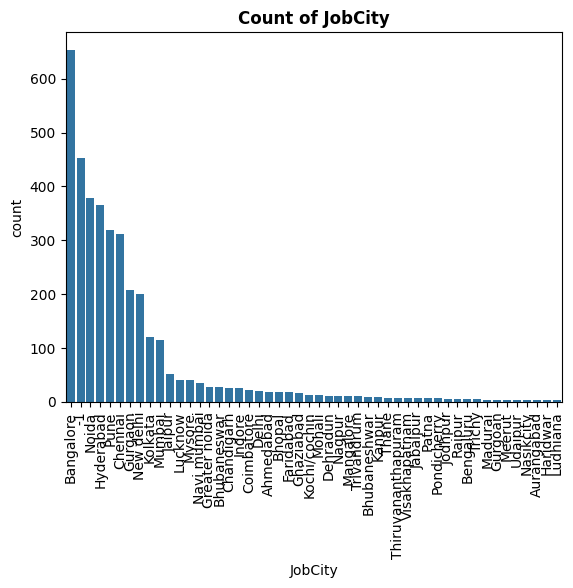

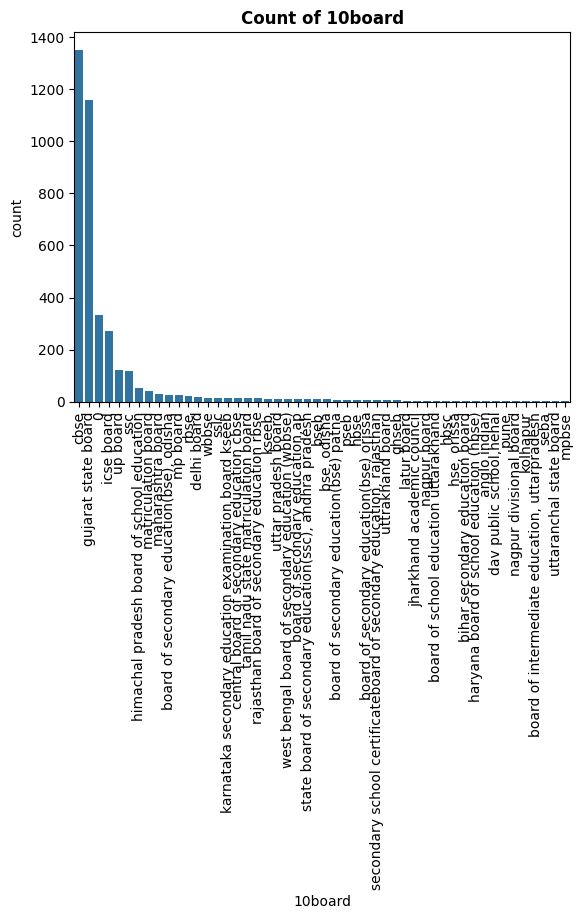

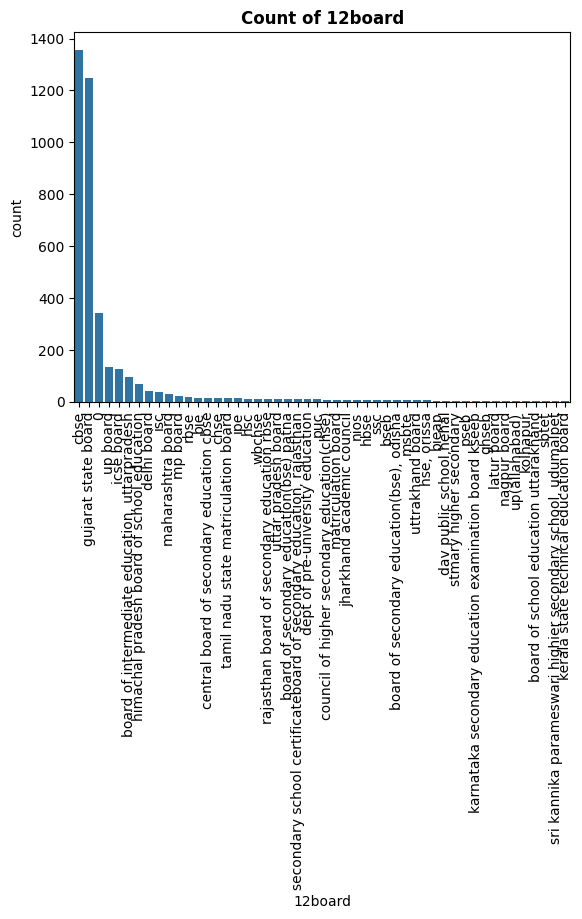

In [40]:
cat_var2 = ['Designation', 'JobCity', '10board','12board']

# Plot of top 50
for var in cat_var2:
    fig, ax = plt.subplots()
    col_order = df[var].value_counts().index[:50]
    sb.countplot(data=df,x=var,order=col_order)
    plt.xticks(rotation=90)
    plt.title(f"Count of {var}",weight='bold');

In [41]:
# replace -1 in categorical column with nan
df['JobCity']= df['JobCity'].replace('-1',np.nan)
df['10board']= df['10board'].replace('0',np.nan)
df['12board']= df['12board'].replace('0',np.nan)


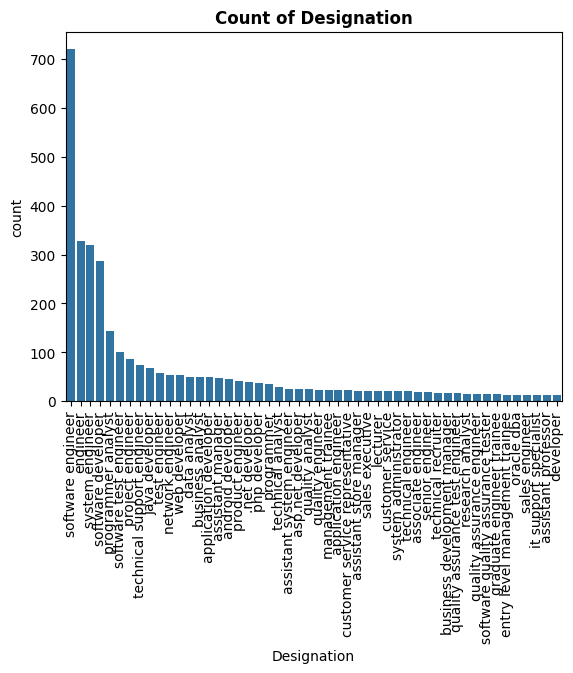

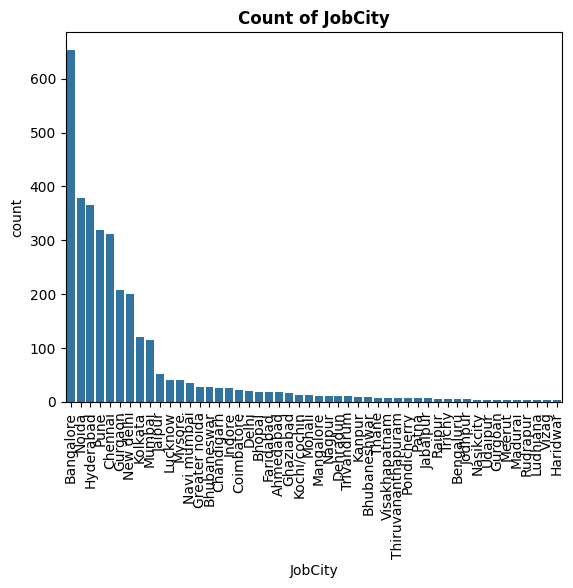

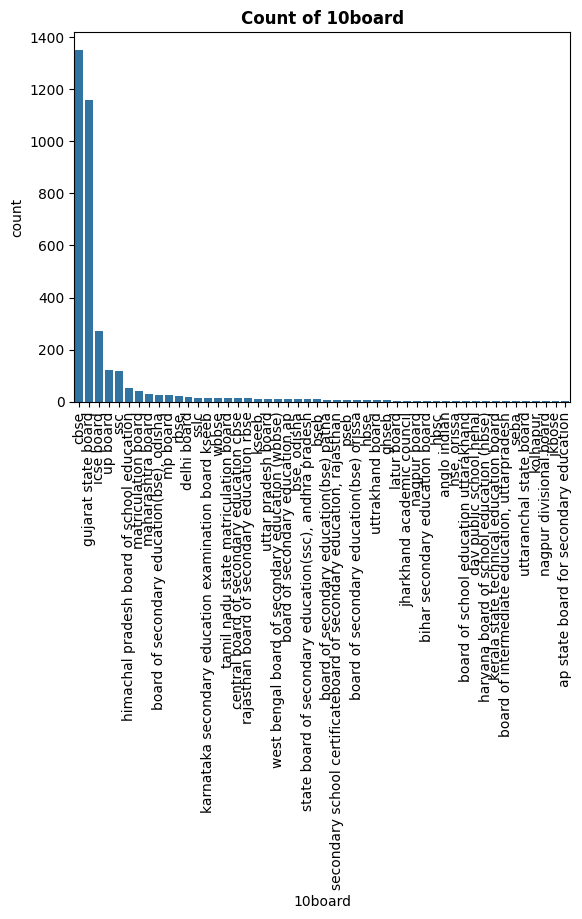

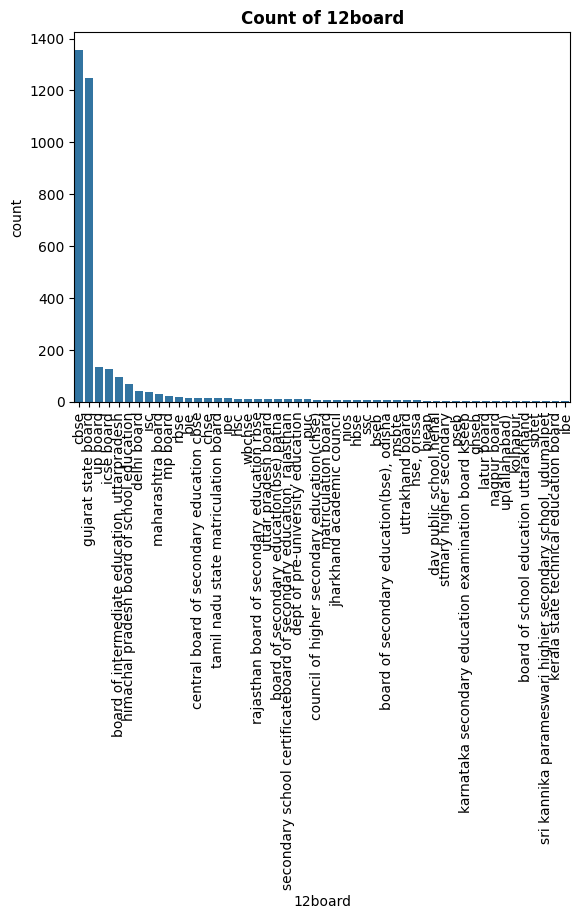

In [42]:
# rePlot of top 50
for var in cat_var2:
    fig, ax = plt.subplots()
    col_order = df[var].value_counts().index[:50]
    sb.countplot(data=df,x=var,order=col_order)
    plt.xticks(rotation=90)
    plt.title(f"Count of {var}",weight='bold');

## Bivariate analysis

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age_at_hire
Salary,1.000000,0.177670,0.170591,0.129986,0.178142,0.179536,0.230152,0.104467,0.115509,0.001370,-0.100689,0.018473,-0.047586,-0.022650,0.037671,-0.063465,0.058834,-0.009968,-0.055571,-0.010939,-0.006558
10percentage,0.177670,1.000000,0.643428,0.312628,0.350744,0.315834,0.317831,0.078683,0.054336,0.085430,-0.018825,0.049265,0.074484,0.049463,0.030032,0.067225,0.136461,-0.004322,-0.132387,0.037249,-0.269789
12percentage,0.170591,0.643428,1.000000,0.346563,0.212715,0.243021,0.312567,0.073947,0.081195,0.116976,-0.043258,0.036754,0.064130,0.044390,0.005968,0.058069,0.104113,-0.007375,-0.093975,0.006851,-0.335754
collegeGPA,0.129986,0.312628,0.346563,1.000000,0.106791,0.197137,0.217628,0.107512,0.136702,0.030258,0.007482,-0.031520,0.052222,-0.005299,-0.018977,0.069842,0.068531,-0.032377,-0.075255,0.028250,-0.111789
English,0.178142,0.350744,0.212715,0.106791,1.000000,0.444213,0.375236,0.089355,0.125822,0.018948,0.059707,-0.004513,0.032520,-0.005725,-0.007697,0.034511,0.195416,0.018530,-0.155862,0.068152,-0.065063
Logical,0.179536,0.315834,0.243021,0.197137,0.444213,1.000000,0.500331,0.169222,0.184627,-0.010057,0.045051,-0.011663,0.012215,-0.012637,-0.011191,0.025689,0.167925,-0.006574,-0.178519,0.049612,-0.085802
Quant,0.230152,0.317831,0.312567,0.217628,0.375236,0.500331,1.000000,0.206762,0.146487,0.104988,-0.043237,0.018515,0.021054,0.021504,0.000561,-0.005506,0.104519,-0.028737,-0.132692,0.020636,-0.094632
Domain,0.104467,0.078683,0.073947,0.107512,0.089355,0.169222,0.206762,1.000000,0.306315,0.090682,0.058955,0.048079,0.042950,0.024552,0.017606,-0.039363,0.052556,-0.024838,-0.018048,0.010526,-0.013337
ComputerProgramming,0.115509,0.054336,0.081195,0.136702,0.125822,0.184627,0.146487,0.306315,1.000000,-0.370195,0.253189,-0.283760,-0.138312,-0.248432,-0.088303,0.013850,0.078038,0.043432,-0.084648,0.043028,0.016247
ElectronicsAndSemicon,0.001370,0.085430,0.116976,0.030258,0.018948,-0.010057,0.104988,0.090682,-0.370195,1.000000,-0.273899,-0.109059,0.036978,0.387330,0.002860,-0.026884,-0.025150,-0.045032,0.021872,-0.014047,-0.020988


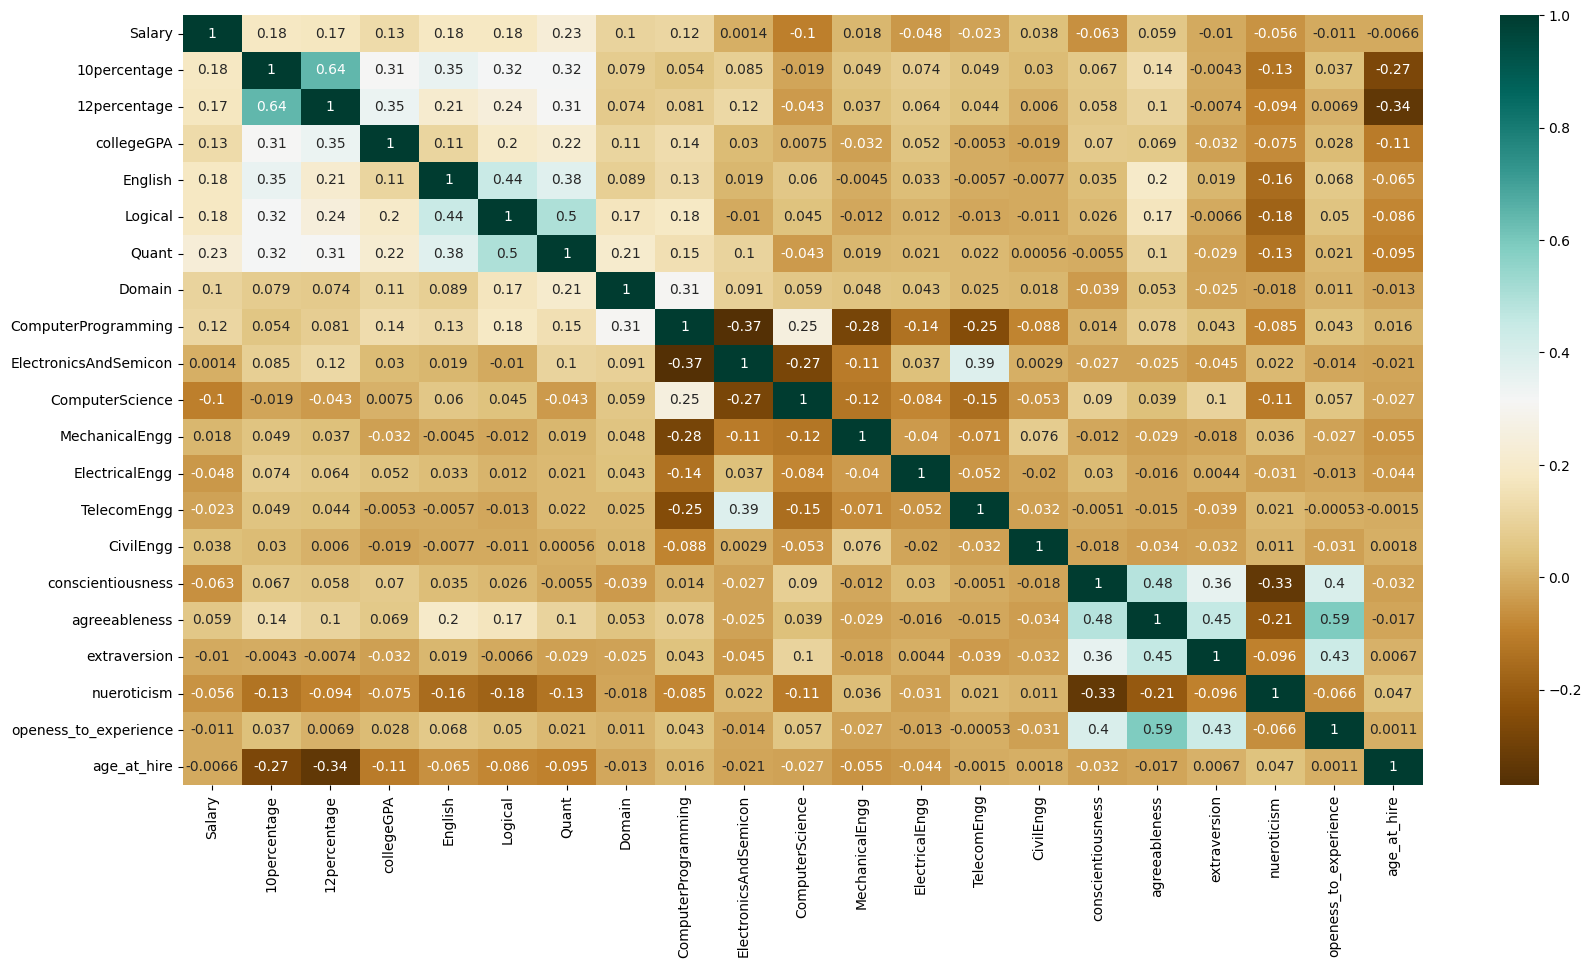

In [43]:
#find the relationship between variable
plt.figure(figsize=(20,10))
correlation = numerical_data.corr()
sb.heatmap(correlation,cmap="BrBG",annot=True)
correlation

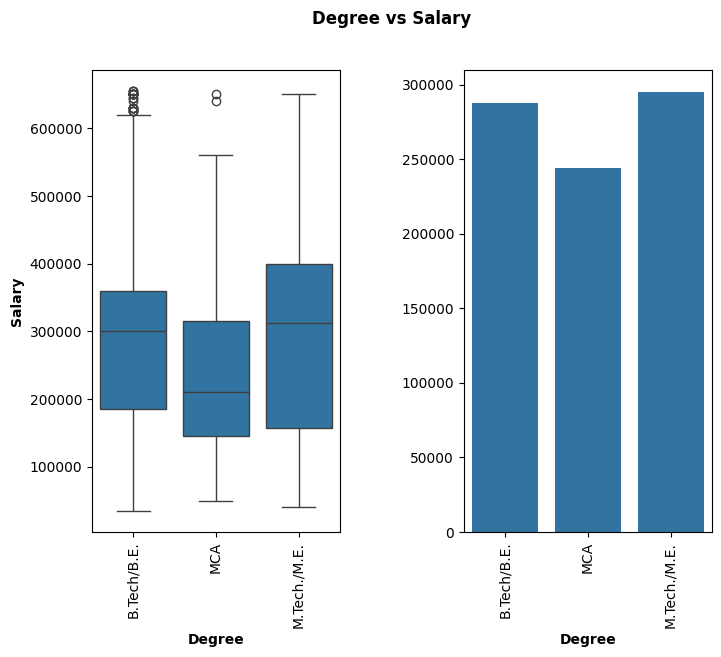

In [44]:
# Relationship between Degree and Salary
fig,(ax1,ax2)= plt.subplots(1, 2, figsize=[8,6])

# Boxplot
sb.boxplot(data=df, x='Degree', y='Salary', ax=ax1)
ax1.tick_params('x', labelrotation=90)
ax1.set_xlabel("Degree", weight='bold')
ax1.set_ylabel("Salary",weight='bold')

# Barplot
sb.barplot(data=df, x= 'Degree', y= 'Salary',errorbar=None, ax=ax2)
ax2.tick_params('x', labelrotation=90)
ax2.set_xlabel("Degree",weight='bold')
ax2.get_yaxis().get_label().set_visible(False)
plt.suptitle("Degree vs Salary", fontweight= "bold")
plt.subplots_adjust(wspace= 0.5);

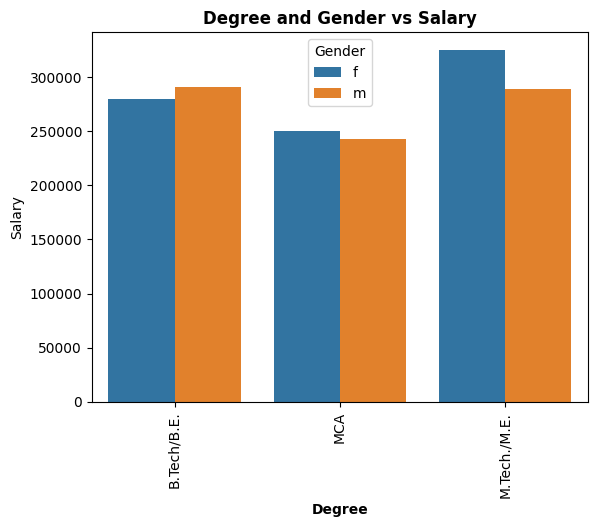

In [45]:
# Relationship between Degree and Salary and Gender
# Clusterbar
sb.barplot(data=df, x= 'Degree', y= 'Salary', errorbar=None, hue='Gender')
plt.tick_params('x', labelrotation=90)
plt.xlabel("Degree", weight='bold')
plt.title("Degree and Gender vs Salary", fontweight= "bold");

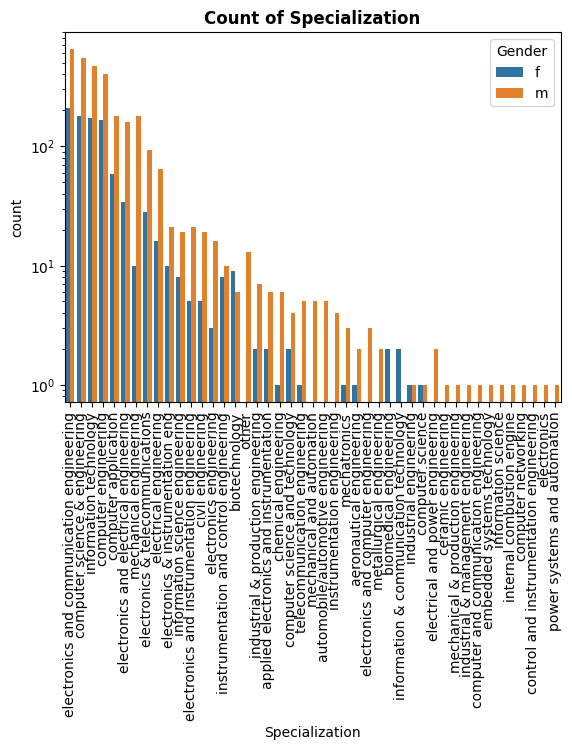

In [46]:
# relationship between gender and specialization
col_order = df['Specialization'].value_counts().index
sb.countplot(data=df,x='Specialization',order=col_order,hue='Gender')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Count of Specialization",weight='bold');

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [47]:
progAnalyst_soft_hard_asso_engr = df[
    df.Designation.isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])
]

In [48]:
progAnalyst_soft_hard_asso_engr[['Designation','DOJ','Salary','GraduationYear']].head()

,Designation,DOJ,Salary,GraduationYear
6,software engineer,2014-08-01,300000,2014
14,software engineer,2013-07-01,300000,2013
19,software engineer,2014-09-01,325000,2012
20,software engineer,2010-11-01,320000,2010
21,software engineer,2012-08-01,200000,2012


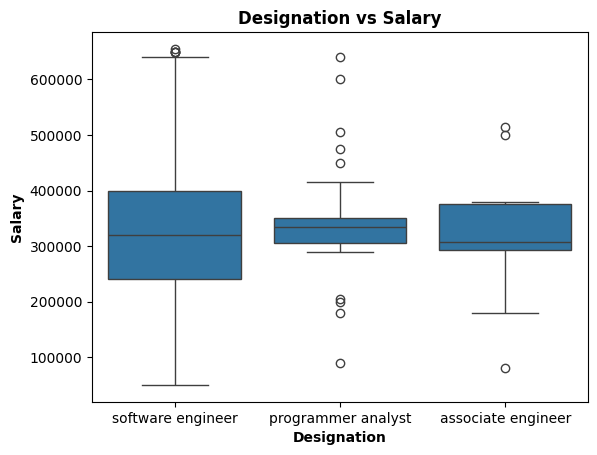

In [49]:
sb.boxplot(data=progAnalyst_soft_hard_asso_engr, x='Designation', y='Salary')
plt.xlabel('Designation',fontweight= 'bold')
plt.ylabel('Salary',fontweight= 'bold')
plt.title('Designation vs Salary', fontweight= "bold");

## Summary

Majority of the numerical variables have a normal distribution. Few are right skewed.<br>

Most earnings of employees are between 100000 and 400000

Most of the employees hired are between ages 21 and 24

Majority employees have college GPA between 62 and 80

Most employees have a Bachelors degree. only few have MCA, M.Tech and M.E

Females with Master degree earn more on average

Employees with a master degree earn more on average

Majority of the employees work in Bangalore

Electronics and communication engineering is the most common specialization among employees, followed by computer science and engineering and information technology

Software engineering is the most common designation among employees

The candidate scores and age show no correlation with the salary. Most of Numerical variables shows no correlation with each other. However, 10percentage and 12 percentage, agreeableness and open to experience shows a moderate positive correlation with each other. 

Male are dominant in all the specializations except biotechnology where females are more, while information and communication technology has only females


